In [58]:
import matplotlib.pyplot as plt
import healpy as hp
from pyuvdata import UVBeam
from pyuvdata import UVData
from MoonLSTs import zenithdec, zenithra  #Importing the RA and Dec for HERA zenith
from pylab import meshgrid, cm
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
%matplotlib notebook

In [59]:
hera_beam = UVBeam() #Instantiating HERA's beam as a UVBeam object
hera_beam.read_beamfits("NF_HERA_power_beam_healpix.fits") #Reading in the beam model
nside = hera_beam.nside #Setting the nside variable to be used in plotting

<IPython.core.display.Javascript object>


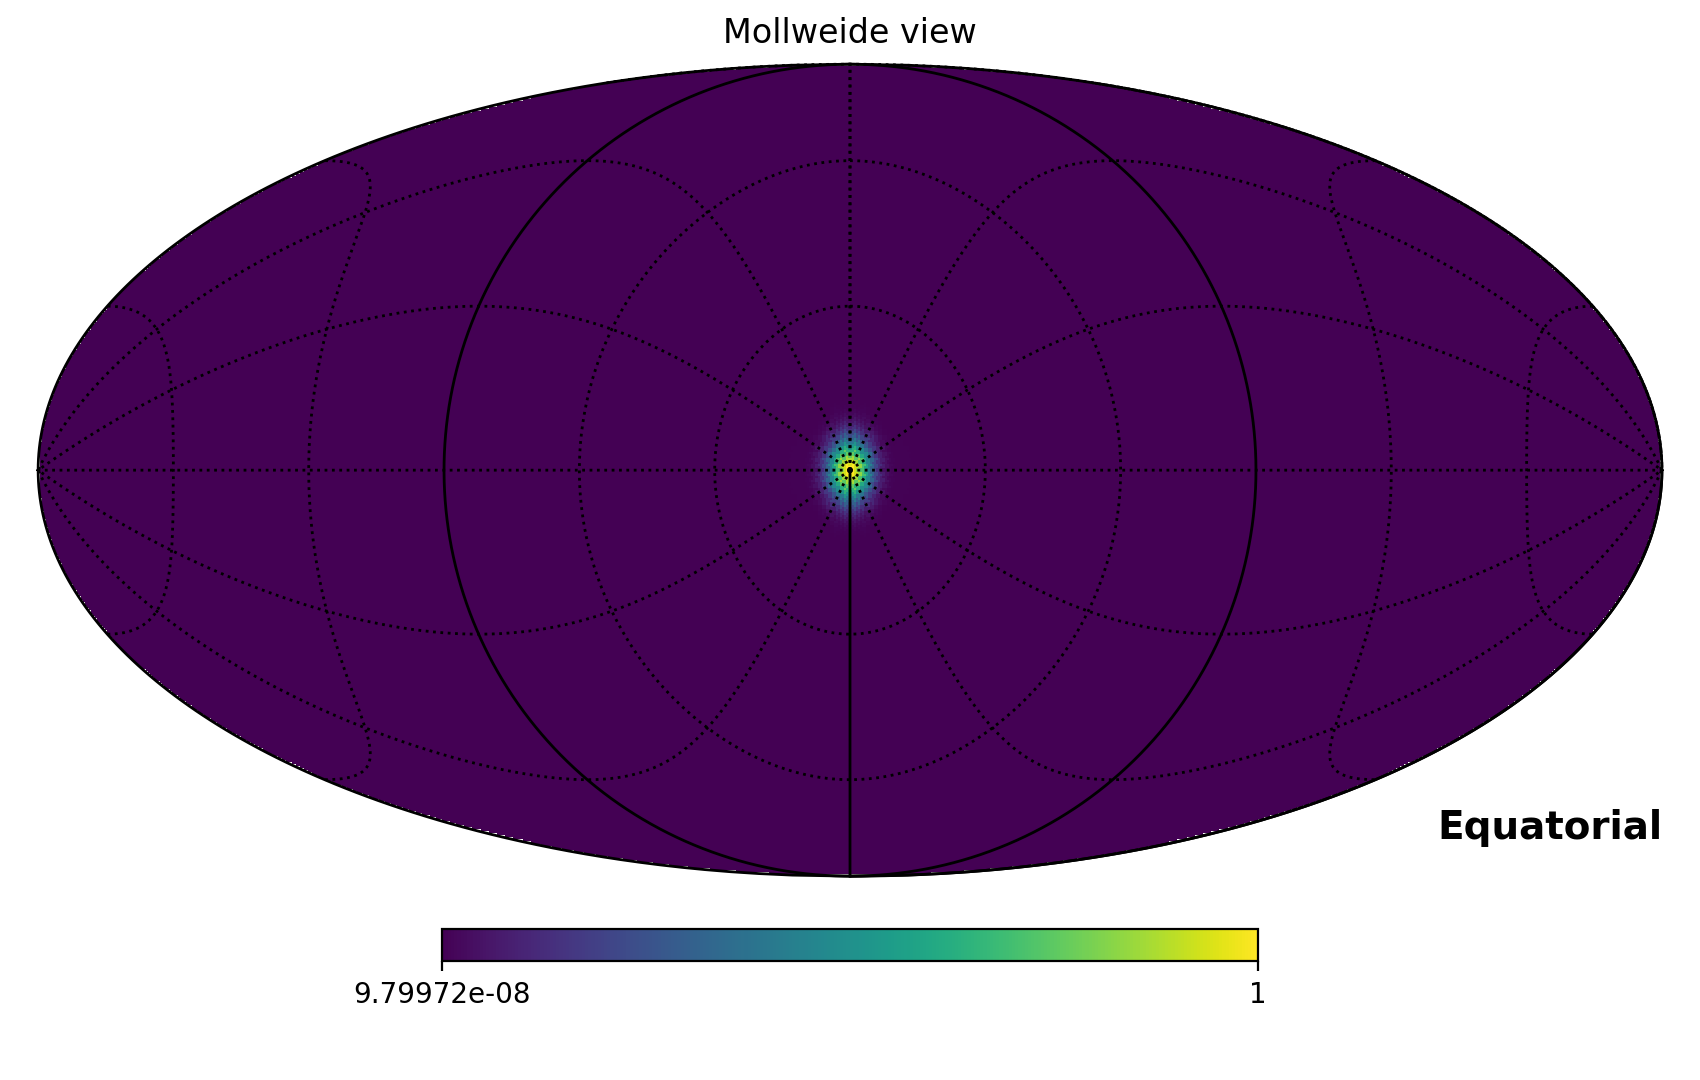

0.0 180.0 -180.0 180.0
The interval between parallels is 30 deg -0.00'.
The interval between meridians is 30 deg -0.00'.


In [60]:
beam_map = hera_beam.data_array[0][0][0][80] #Selecting a specific frequency to observe
beam_map_norm = beam_map/np.max(beam_map)
mapping = hp.mollview(beam_map_norm, nest=None, coord="C", return_projected_map=True #)
                                                ,rot=[0.0,90.0]) #Best look at beam
                                                #,rot=[21.4,-30.7])
hp.graticule()

In [5]:
#Getting familiar with beam_map
#print beam_map
print len(beam_map), np.max(beam_map), np.min(beam_map), beam_map.shape, type(beam_map)

49152 12516.439491241637 0.001226575516619302 (49152,) <type 'numpy.ndarray'>


In [61]:
print hera_beam.data_array.shape

(1, 1, 2, 101, 49152)


In [62]:
hera_beam._data_array.description

'Depending on beam type, either complex E-field values ("efield" beam type) or power values ("power" beam type) for beam model. units are linear normalized to either peak or solid angle as given by data_normalization. The shape depends on the beam_type and pixel_coordinate_system, if it is "healpix", the shape is: (Naxes_vec, Nspws, Nfeeds or Npols, Nfreqs, Npixels), otherwise it is (Naxes_vec, Nspws, Nfeeds or Npols, Nfreqs, Naxes2, Naxes1)'

<IPython.core.display.Javascript object>


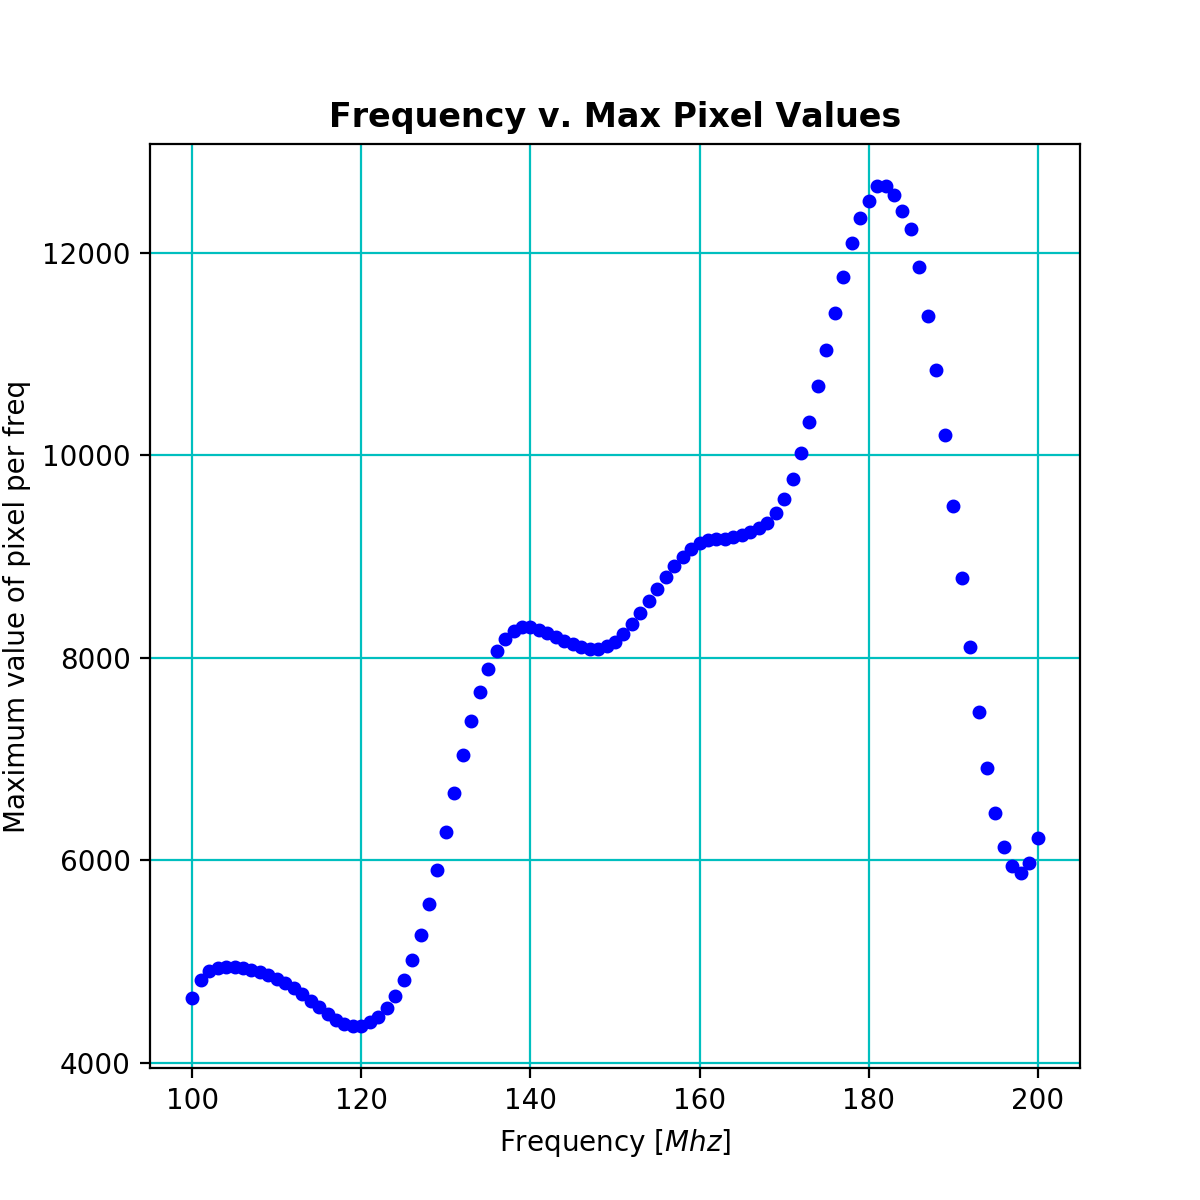

In [63]:
fig1 = plt.figure(figsize=(6.0,6.0))
#Plotting Frequency vs Maximum pixel value for each freq.
for i in range(101):
    plt.plot(i+100,np.max(hera_beam.data_array[0][0][0][i]), "bo", markersize=4.0)
plt.xlabel("Frequency [$Mhz$]")
plt.ylabel("Maximum value of pixel per freq")
plt.title("Frequency v. Max Pixel Values", fontweight="bold")
plt.grid(True, color="c")

In [9]:
"""
m = np.arange(hp.nside2npix(nside))
hp.gnomview(beam_map, rot=[21.4,-30.7])
hp.graticule()
"""

'\nm = np.arange(hp.nside2npix(nside))\nhp.gnomview(beam_map, rot=[21.4,-30.7])\nhp.graticule()\n'

In [64]:
zenithra                             #Checking for RA value correctness
zenithra_deg = np.rad2deg(zenithra)  #Converting from radians to degrees
print zenithra_deg

313.3679874878402


In [65]:
zenithdec                              #Checking for Dec value correctness
zenithdec_deg = np.rad2deg(zenithdec)  #Converting from radians to degrees
print zenithdec_deg

-30.72152612068925


In [66]:
def beam_factor_2D(ra, dec, hera_zen_ra, freq):
    """
    Outputs the beam factor of an objects's specified RA and Dec.
    Args:
    'ra'          : Object's Right Ascension in degrees
    'dec'         : Object's Declination in degrees
    'hera_zen_ra' : HERA's Zenith Right Ascension for the specific JDate in degrees
    'freq'        : The frequency we want to analyze (interger)
    """
    hera_ra    = ra                                    #RA as seen by HERA
    hera_dec   = np.abs(dec)                           #Dec as seen by HERA
    rel_dec    = hera_dec - 30.72152612068925          #Finding relative Dec at HERA
    rel_ra     = np.abs(hera_ra - hera_zen_ra)         #Finding relative RA at HERA
    np_dec     = 90.0 - np.abs(rel_dec)                #Finding corresponding North Pole Dec
    np_ra      = rel_ra                                #Finding corresponding North Pole RA
    
    freq           = freq - 100                           #Changing the freq to array element
    beam_map       = hera_beam.data_array[0][0][0][freq]  #Selecting specified frequency
    beam_map_norm  = beam_map/np.max(beam_map)            #Normalizing values of beam model
    
    #Finding pixel value @ specified coords.
    return hp.get_interp_val(beam_map_norm,np_ra,np_dec, lonlat=True)

In [67]:
beam_factor_2D(zenithra_deg,zenithdec_deg,zenithra_deg,110)

0.9999999999999869